##### IMPORTANDO PACOTES ESTATÍSTICOS

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, PassiveAggressiveClassifier, RidgeClassifier


##### CARREGANDO DADOS

In [7]:
df_dados = pd.read_csv("/Users/emilia.franca/Documents/jean/nbaplayers.csv")
df_dados

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


##### PREPARANDO DADOS

In [8]:
df_features = df_dados.drop(columns=['target_5yrs', "name", "Unnamed: 0"]).copy()

target = df_dados['target_5yrs'].array

df_features

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8


##### VERIFICANDO POSSÍVEL DESBALANCEAMENTO DOS DADOS

In [9]:
print(df_dados['target_5yrs'].value_counts())


1    831
0    509
Name: target_5yrs, dtype: int64


##### VISUALIZANDO A DISTRIBUIÇÃO DAS FEATURES

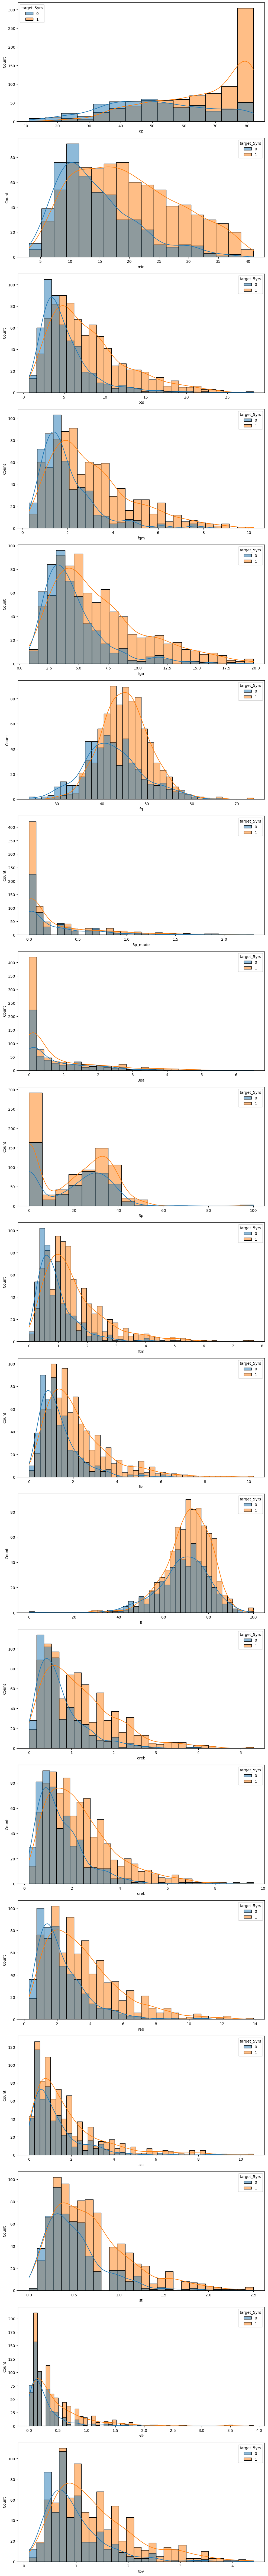

In [10]:

num_features = df_dados.drop(columns = ['target_5yrs', 'name', 'Unnamed: 0'], axis=1).shape[1]


fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5*num_features))

# Plota a distribuição de cada feature
for i, col in enumerate(df_dados.drop(columns = ['target_5yrs', 'name', 'Unnamed: 0'], axis=1).columns):
    sns.histplot(data=df_dados, x=col, hue="target_5yrs", kde=True, ax=axes[i])

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()



#### VISUALIZANDO COM REDUÇÃO DE DIMENSIONALIDADE

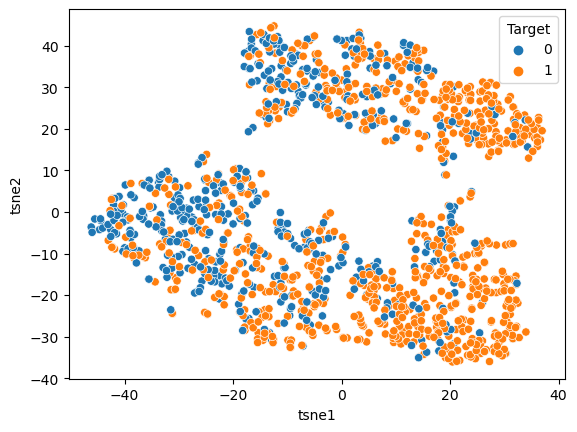

In [11]:
X_embedded = TSNE(n_components=2, init = 'random', learning_rate='auto').fit_transform(df_features.values)

X_embedded

df_tsne = pd.DataFrame(X_embedded,columns=['tsne1','tsne2'])

df_tsne['target_5yrs'] = df_dados['target_5yrs']

sns.scatterplot(data=df_tsne, x="tsne1", y="tsne2", hue="target_5yrs")
plt.legend(title="Target")
plt.show()


##### TREINAMENTO E AVALIAÇÃO DO NOSSO MODELO

In [88]:
def getModel():
    # return LogisticRegression(max_iter=5000)
    # return RandomForestClassifier()
    # return DecisionTreeClassifier()
    # return AdaBoostClassifier()
    # return ExtraTreesClassifier()
    # return BaggingClassifier()
    # return Perceptron()
    # return PassiveAggressiveClassifier()
    # return RidgeClassifier()
    # return MLPClassifier(hidden_layer_sizes=(100,), solver='adam', alpha=0.0001, learning_rate='adaptive', max_iter=200,random_state=42)
   


##### SEPARANDO OS DADOS DE TREINO E TESTE E TREINANDO O MODELO

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df_features.values, target, test_size=0.2)

model = getModel().fit(X_train,y_train)

##### TREINANDO E AVALIANDO COM VALIDAÇÃO CRUZADA

In [90]:
# Configurar o StratifiedKFold, que garante garante que cada 
#fold da validação cruzada mantenha a mesma proporção de exemplos de cada classe
skf = StratifiedKFold(n_splits=10)

In [91]:
scores = cross_val_score(getModel(), df_features.values, target, cv=skf)

print('Acurácia CV=',np.mean(scores))

Acurácia CV= 0.6850746268656716


##### CRIANDO A MATRIZ DE CONFUSÃO

In [97]:
y_pred = cross_val_predict(getModel(), df_features.values, target, cv=skf)

cm = confusion_matrix(target,y_pred)


array([[266, 243],
       [168, 663]])

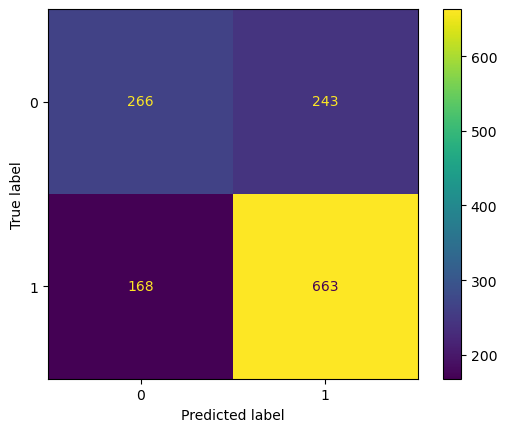

In [98]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,)

cm_disp.plot()

plt.show()

### Avaliando com Recall, Precision E F1_score

In [99]:
recall = recall_score(target, y_pred)
precision = precision_score(target, y_pred)
f1score = f1_score(target, y_pred)

In [100]:
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1_score: {f1score:.2f}")



Recall: 0.80
Precision: 0.73
F1_score: 0.76


##### AVALIANDO COM AUC-ROC

In [103]:
# Obter as probabilidades previstas para o conjunto de teste
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Índice 1 para a classe positiva

auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f"AUC-ROC: {auc_roc:.3f}")

AUC-ROC: 0.668
